---
<center><img src="https://media4.giphy.com/media/l2SpVPT2FnKozPDby/giphy.gif?cid=ecf05e47oj3fdr2c0vxys8zt8rauepk2bkwtjqdy1y3qtf86&rid=giphy.gif&ct=g" alt="centered image" height="200
    " width="500"> </center>


---

    
<u> <h1> Presenting by:</h1></u>
<h4> Eliya Zaguri</h4>
<h4> Matan Vidal</h4>
<h4> Adar Saban</h4>

<u> <h1>Table of contents </h1></u>

Link to source : https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history

1. [Arranging and clearing the data according to our needs](#section1)

2. [Key comprehension](#section2)

3. [First conclusion](#section3)

3. [Second conclusion](#section4)

---

<a id='section1'></a>
<u><h1> Organize and clearing the data according to our needs </h1></u>

### Performing import and reading of a database


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

url='https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/athlete_events%20-%20Copy.csv '
data=pd.read_csv(url)

### Checking the indentation of the column title.

In [3]:
data.dtypes 

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Filling in missing values ​​for each sport in its field according to the average of that field.

In [4]:
data["Age"] = data.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))
data["Height"] = data.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.mean()))
data["Weight"] = data.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.mean()))

### Deletion of sports categories where the number of medals is low. Focus on popular sports.

In [5]:
data.Sport.unique()
data['Sport'].value_counts(ascending=True)
data=data.groupby('Sport').filter(lambda x : len(x)>100) 
data['Sport'].value_counts(ascending=False)

Athletics                    27472
Gymnastics                   18333
Swimming                     16298
Shooting                      8086
Fencing                       7772
Cycling                       7716
Rowing                        7319
Cross Country Skiing          6364
Alpine Skiing                 6319
Wrestling                     4994
Football                      4933
Sailing                       4710
Equestrianism                 4470
Boxing                        4350
Canoeing                      4302
Speed Skating                 3829
Ice Hockey                    3746
Hockey                        3707
Biathlon                      3301
Basketball                    3243
Weightlifting                 2766
Judo                          2705
Handball                      2652
Water Polo                    2628
Art Competitions              2597
Volleyball                    2323
Bobsleigh                     2076
Diving                        2008
Tennis              

### Check that there are no cells with missing values. (Except what we want)

In [6]:
data.isnull().sum().sort_values(ascending=True)

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     162761
dtype: int64

---
<a id='section2'> </a>
<u><h1>Key comprehension </h1></u>
### Presentation of the 10 countries with the most participants over the years.

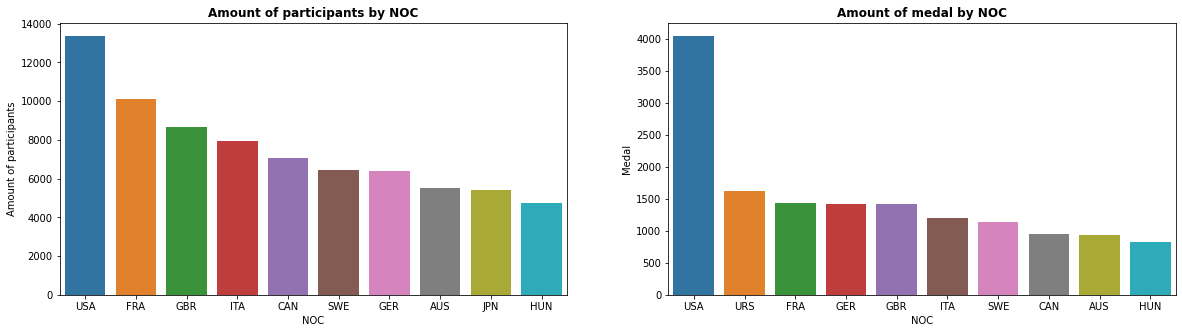

In [11]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
Top_10=pd.DataFrame(data[['NOC']].value_counts().sort_values(ascending=False).head(10).reset_index(name='Amount of participants'))
barpolt_amount_of_part=sns.barplot(data=Top_10,x='NOC',y='Amount of participants',ax=axes[0]);
Medal_by_countries=data.groupby(['NOC'])[['Medal']].count().sort_values(by='Medal',ascending=False).reset_index().head(10)
barplot_amount_of_medal=sns.barplot(data=Medal_by_countries,x='NOC',y='Medal',ax=axes[1]);
plt.subplots_adjust(wspace = 0.2)
barpolt_amount_of_part.set_title('Amount of participants by NOC',fontweight ="bold")
barplot_amount_of_medal.set_title('Amount of medal by NOC',fontweight ="bold")
plt.show()

---
<a id='section3'> </a>
<u><h1> First conclusion </h1></u>

## We examined whether the gender gap between males and females over the years, in participation and winning a medal.

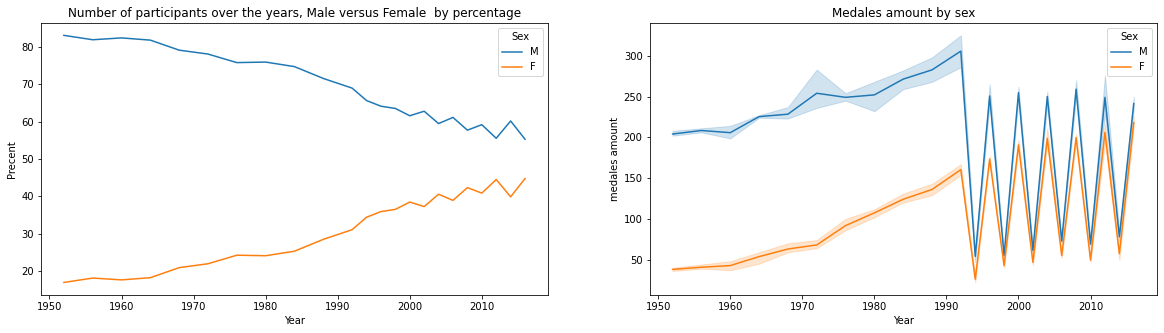

In [8]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
last_sixty_years=data[data.Year>=1950] 

data_by_sex_year=last_sixty_years.groupby('Year')[['Sex']].value_counts().reset_index(name='Participants')
data_by_sex_year['Precent']=data_by_sex_year.groupby('Year')['Participants'].transform(lambda x:(x/x.sum()*100))
first_conclusion=sns.lineplot(data=data_by_sex_year, x="Year", y="Precent", hue="Sex",markers=True,ax=axes[0]);
first_conclusion.set_title('Number of participants over the years, Male versus Female  by percentage');


g_medal_by_sex_year=last_sixty_years.groupby(['Sex','Year'])['Medal'].value_counts().reset_index(name='medales amount').sort_values(by='medales amount',ascending=False)
lineplot_Medal_amount_by_sex=sns.lineplot(data=g_medal_by_sex_year, x="Year", y="medales amount", hue="Sex",markers=True,ax=axes[1]);
plt.subplots_adjust(wspace = 0.2)
lineplot_Medal_amount_by_sex.set_title('Medales amount by sex');
plt.show()


## As you can see from the graphs. The gap is narrowing over the years, both in the number of participants and in the number of medal wins.
---

<a id='section4'></a>
<u><h1> Second conclusion</h1></u>
## Several studies show that the peak fitness of athletes is between the ages of 26-28. We wanted to see if the age of winning the medal matched the statement.

דרופ אנד איי עמ לבדוק את הגיל למחוק את האנשים שלא זכו במדליות כי אנו בודקים את כמות המדליות עפ סוג בכל גיל.
בדיקה שבאמת מחקנו את את הערכים החסרים.
לקחנו מתחת לגיל 45 מכיוון ששם כמות המדליות היא אפסית.
גרופ ביי  - סכמנו את כמות האנשים באותו גיל שזכו באותה סוג מדליה
הלכנו בדרך השלילה ,כאשר אם היינו מקבצים גיל עפ סכימת סוגי המדליות היינו מקבלים את הגיל-וכמה מדליות זכה ללא שוני בסוג המדליה כאשר רצינו שתהיה הפרדה בין סוגי המדליות עפ גיל.  


<center><img src="https://www.nationalworld.com/webimg/b25lY21zOjc5YzVhNTNlLTUyM2MtNDVjOC1iYTI1LTQ2YzNkNTgxMjA4ZTphNTFmZmU0Mi1lY2Q2LTQ2OWMtOTk1Yi00ZTcxZTk5MTJhYTY=.jpg?&width=640" alt="centered image" height="100
    " width="1000"> </center>


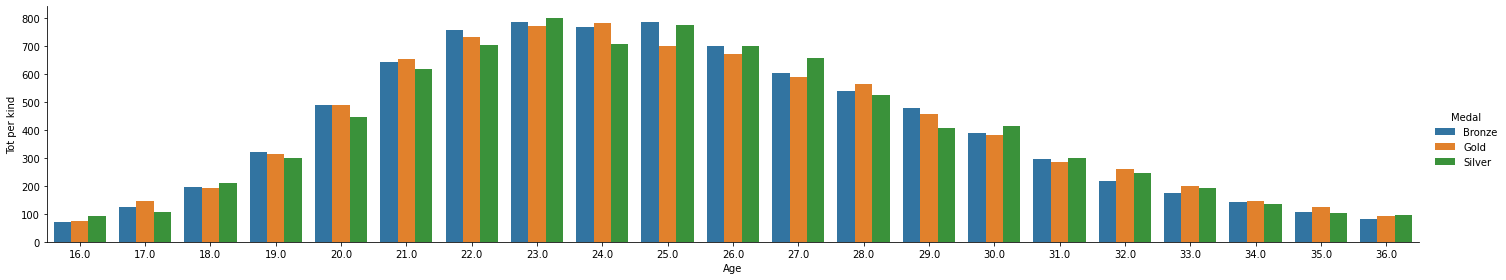

In [9]:
data_no_NaN=data.dropna()
data_no_NaN.isnull().sum().sort_values(ascending=False)
data_no_NaN=data_no_NaN[(data_no_NaN.Age<=36)&(data_no_NaN.Age>=16)].round()
data_Age_by_Medal=data_no_NaN.groupby('Medal')[['Age']].value_counts().reset_index(name='Tot per kind').round(1)
data_Age_by_Medal=pd.DataFrame(data_Age_by_Medal)
sns.catplot(data=data_Age_by_Medal,x="Age",y="Tot per kind",kind="bar",aspect=5,height=4,hue="Medal");

## As can be seen from the graph, the winning age that collected the most medals is age 23. The claim does not match the winning age.
---

<a id='section5'></a>
<u><h1> Third conclusion</h1></u>
## BMI is a measure that gives a quantitative assessment of whether a person is at a normal weight. 
## We examined whether there is a contact between a normal BMI measure and winning a medal .


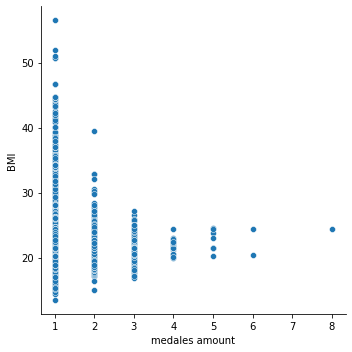

In [10]:
data_of_medal_by_id=data.groupby(['ID','Age','Height','Weight'])['Medal'].value_counts().reset_index(name='medales amount')
data_with_BMI=data_of_medal_by_id.assign(BMI=lambda x: ((x['Weight'])/ ( (x['Height']/100)**2) ))
data_with_BMI
sns.relplot(x='medales amount',y="BMI", data=data_with_BMI, kind="scatter");

  </style>